In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Настройки для отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)

In [ ]:
# Загрузка CSV файла
# Замени 'your_dataset.csv' на путь к твоему файлу
df = pd.read_csv('../data/observations.csv')
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")


Размер датасета: 142238 строк, 46 столбцов


In [4]:
df.head()

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,1237,8179499c-63c2-4892-8c79-12a10f578047,2008-12-30,2008-12-30,NaN,Pacific Time (US & Canada),32,ap2il,NaN,2009-01-13 21:52:46 UTC,2025-10-09 03:52:48 UTC,research,NaN,http://www.inaturalist.org/observations/1237,https://static.inaturalist.org/photos/1367/med...,NaN,NaN,My parents took video of this coyote when they...,2,0,False,NaN,"Mission Peak Regional Preserve, California",37.512436,-121.880516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Alameda,California,United States,California,Alameda,Coyote,Canis latrans,Coyote,Mammalia,42051
1,1238,158136b1-8eba-4b1b-9fff-7fe5f42daf05,"January 12, 2008 17:04",2008-01-12,2008-01-13 01:04:00 UTC,Pacific Time (US & Canada),1,kueda,Ken-ichi Ueda,2009-01-13 23:26:04 UTC,2025-02-28 15:09:51 UTC,research,CC0,http://www.inaturalist.org/observations/1238,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Seriously Matt, how do you <a href=""http://fli...",4,0,False,NaN,"Lafayette, California, United States",37.936195,-122.115005,NaN,NaN,NaN,NaN,NaN,NaN,open,False,NaN,NaN,NaN,Contra Costa,California,United States,California,Contra Costa,Coyote,Canis latrans,Coyote,Mammalia,42051
2,1711,331de81f-f9de-446e-b75e-182a63de3cc4,"February 21, 2009 15:14",2009-02-21,2009-02-21 23:14:00 UTC,Pacific Time (US & Canada),1,kueda,Ken-ichi Ueda,2009-02-22 19:17:50 UTC,2023-06-18 22:54:49 UTC,research,CC0,http://www.inaturalist.org/observations/1711,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,Why won't they stay still. And come closer. ...,5,0,False,NaN,"Alamo, California, United States",37.880596,-121.999969,NaN,NaN,NaN,NaN,NaN,NaN,open,False,NaN,NaN,NaN,Contra Costa,California,United States,California,Contra Costa,Coyote,Canis latrans,Coyote,Mammalia,42051
3,2224,58101a23-e41c-4e0c-a6c4-d610cae81345,2009-03-18,2009-03-18,NaN,Eastern Time (US & Canada),169,flapack,NaN,2009-04-06 03:54:15 UTC,2025-02-28 15:11:32 UTC,research,CC-BY-NC,http://www.inaturalist.org/observations/2224,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,4,0,False,NaN,"Zia Pueblo, NM",35.467434,-106.684647,NaN,NaN,NaN,NaN,NaN,NaN,open,False,NaN,NaN,NaN,Sandoval,New Mexico,United States,New Mexico,Sandoval,Coyote,Canis latrans,Coyote,Mammalia,42051
4,2611,df7b09dd-11f9-4402-8f6d-105121ce277e,"May 09, 2009 19:26",2009-05-09,2009-05-10 02:26:00 UTC,Pacific Time (US & Canada),32,ap2il,NaN,2009-05-13 19:21:56 UTC,2025-08-18 13:22:27 UTC,research,NaN,http://www.inaturalist.org/observations/2611,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,... they were smelly :),4,0,False,NaN,"Corral Hollow: Pleasanton, California",37.629718,-121.532384,NaN,NaN,NaN,NaN,NaN,NaN,open,False,NaN,NaN,NaN,San Joaquin,California,United States,California,San Joaquin,Coyote,Canis latrans,Coyote,Mammalia,42051


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142238 entries, 0 to 142237
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                142238 non-null  int64  
 1   uuid                              142238 non-null  object 
 2   observed_on_string                142238 non-null  object 
 3   observed_on                       142238 non-null  object 
 4   time_observed_at                  136223 non-null  object 
 5   time_zone                         142238 non-null  object 
 6   user_id                           142238 non-null  int64  
 7   user_login                        142238 non-null  object 
 8   user_name                         99190 non-null   object 
 9   created_at                        142238 non-null  object 
 10  updated_at                        142238 non-null  object 
 11  quality_grade                     142238 non-null  o

In [6]:
df.describe()

,id,user_id,num_identification_agreements,num_identification_disagreements,oauth_application_id,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,taxon_id
count,1.422380e+05,1.422380e+05,142238.000000,142238.000000,71534.000000,141113.000000,141113.000000,1.213460e+05,0.0,0.0,0.0,1.250460e+05,1.422380e+05
mean,1.595237e+08,2.897165e+06,2.436620,0.009161,50.240277,34.895534,-73.660577,6.026811e+03,NaN,NaN,NaN,1.108221e+04,1.027058e+05
std,9.910801e+07,2.811488e+06,1.412378,0.105097,187.863313,14.507958,68.545986,1.205466e+05,NaN,NaN,NaN,1.190110e+05,2.071247e+05
min,1.237000e+03,1.000000e+00,1.000000,0.000000,1.000000,-54.947755,-179.606056,0.000000e+00,NaN,NaN,NaN,0.000000e+00,4.204400e+04
25%,6.924842e+07,4.783330e+05,1.000000,0.000000,2.000000,32.674330,-117.633362,8.000000e+00,NaN,NaN,NaN,1.100000e+01,4.205100e+04
50%,1.539698e+08,1.947347e+06,2.000000,0.000000,3.000000,37.277183,-98.712731,3.600000e+01,NaN,NaN,NaN,1.000000e+02,4.205100e+04
75%,2.514635e+08,4.909965e+06,3.000000,0.000000,3.000000,43.038420,-75.114669,2.440000e+02,NaN,NaN,NaN,3.904750e+03,4.205100e+04
max,3.314108e+08,1.002451e+07,49.000000,5.000000,856.000000,83.086120,179.194197,8.929687e+06,NaN,NaN,NaN,8.929687e+06,1.305709e+06


In [7]:
# Проверим уникальные научные названия
print(f"Всего уникальных видов (scientific_name): {df['scientific_name'].nunique()}")
print(f"Всего наблюдений: {len(df)}")

Всего уникальных видов (scientific_name): 51
Всего наблюдений: 142238


In [8]:
# Посмотрим распределение по видам
species_counts = df['scientific_name'].value_counts()
print(species_counts.head(10))

scientific_name
Canis latrans                  105179
Canis familiaris                16675
Canis lupus                      6719
Canis familiaris dingo           2646
Canis aureus                     2525
Canis lupus italicus             1298
Canis lupus signatus              982
Canis familiaris familiaris       869
Canis aureus indicus              748
Canis lupaster                    695
Name: count, dtype: int64


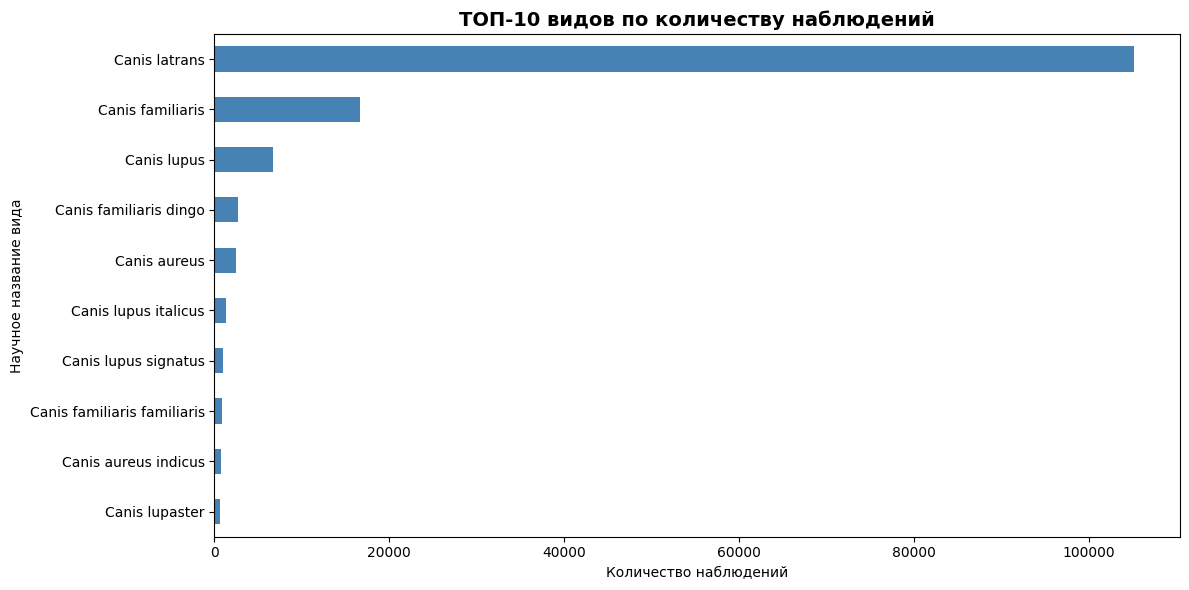

In [9]:
# Визуализация ТОП-10 видов
plt.figure(figsize=(12, 6))
species_counts.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Количество наблюдений')
plt.ylabel('Научное название вида')
plt.title('ТОП-10 видов по количеству наблюдений', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [10]:
# Посмотрим на соответствие научных и общих названий
print("Примеры видов с их названиями:")
species_info = df[['scientific_name', 'common_name', 'species_guess']].drop_duplicates()
print(species_info.head(10))

Примеры видов с их названиями:
             scientific_name        common_name      species_guess
0              Canis latrans             Coyote             Coyote
10               Canis lupus          Gray Wolf          Gray Wolf
12             Canis latrans             Coyote             coyote
17            Canis lupaster       African Wolf       African Wolf
25              Canis lycaon       Eastern Wolf       Eastern Wolf
35  Canis lupus occidentalis  Northwestern Wolf  Northwestern Wolf
36    Canis familiaris dingo              Dingo              Dingo
79          Canis familiaris       Domestic Dog       Domestic Dog
83        Canis aureus naria  Sri Lankan Jackal  Sri Lankan Jackal
87      Canis aureus indicus      Indian Jackal      Indian Jackal


In [11]:
# Выбираем топ-5 видов с наибольшим количеством наблюдений
TOP_N = 5
top_species = species_counts.head(TOP_N).index.tolist()

print(f"Выбранные {TOP_N} видов для дальнейшей работы:\n")
for i, species in enumerate(top_species, 1):
    count = species_counts[species]
    common = df[df['scientific_name'] == species]['common_name'].iloc[0]
    print(f"{i}. {species} ({common}): {count} наблюдений")

Выбранные 5 видов для дальнейшей работы:

1. Canis latrans (Coyote): 105179 наблюдений
2. Canis familiaris (Domestic Dog): 16675 наблюдений
3. Canis lupus (Gray Wolf): 6719 наблюдений
4. Canis familiaris dingo (Dingo): 2646 наблюдений
5. Canis aureus (Golden Jackal): 2525 наблюдений


In [12]:
# Фильтруем датасет, оставляя только топ-5 видов
df_filtered = df[df['scientific_name'].isin(top_species)].copy()

print(f"Размер отфильтрованного датасета: {df_filtered.shape[0]}")
print(f"Удалено строк: {df.shape[0] - df_filtered.shape[0]}")

Размер отфильтрованного датасета: 133744
Удалено строк: 8494


In [13]:
print(df_filtered['scientific_name'].value_counts())

scientific_name
Canis latrans             105179
Canis familiaris           16675
Canis lupus                 6719
Canis familiaris dingo      2646
Canis aureus                2525
Name: count, dtype: int64


In [14]:
# Оставляем только нужные колонки
columns_to_keep = [
    'uuid',
    'url', 
    'image_url',
    'species_guess',
    'scientific_name',
    'common_name'
]

df_final = df_filtered[columns_to_keep].copy()

print(f"Оставлены следующие столбцы:")
for col in df_final.columns:
    print(f"   - {col}")
    
print(f"Финальный размер датасета: {df_final.shape}")

Оставлены следующие столбцы:
   - uuid
   - url
   - image_url
   - species_guess
   - scientific_name
   - common_name
Финальный размер датасета: (133744, 6)


In [15]:
df_final.head()

,uuid,url,image_url,species_guess,scientific_name,common_name
0,8179499c-63c2-4892-8c79-12a10f578047,http://www.inaturalist.org/observations/1237,https://static.inaturalist.org/photos/1367/med...,Coyote,Canis latrans,Coyote
1,158136b1-8eba-4b1b-9fff-7fe5f42daf05,http://www.inaturalist.org/observations/1238,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
2,331de81f-f9de-446e-b75e-182a63de3cc4,http://www.inaturalist.org/observations/1711,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
3,58101a23-e41c-4e0c-a6c4-d610cae81345,http://www.inaturalist.org/observations/2224,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
4,df7b09dd-11f9-4402-8f6d-105121ce277e,http://www.inaturalist.org/observations/2611,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote


In [16]:
# Проверим пропущенные значения в финальном датасете
print("Пропущенные значения:")
missing_data = df_final.isnull().sum()
print(missing_data)
print(f"Всего строк с пропущенными image_url: {df_final['image_url'].isnull().sum()}")

Пропущенные значения:
uuid                  0
url                   0
image_url          2461
species_guess       103
scientific_name       0
common_name           0
dtype: int64
Всего строк с пропущенными image_url: 2461


In [17]:
df_final_clean = df_final.dropna(subset=['image_url']).copy()

In [18]:
print(f"Строк: {df_final_clean.shape[0]}")
print(f"Столбцов: {df_final_clean.shape[1]}")
print(f"\nВиды и их количество:")
print(df_final_clean['scientific_name'].value_counts())

Строк: 131283
Столбцов: 6

Виды и их количество:
scientific_name
Canis latrans             102934
Canis familiaris           16629
Canis lupus                 6649
Canis familiaris dingo      2626
Canis aureus                2445
Name: count, dtype: int64


In [19]:
print("Примеры финальных данных:")
df_final_clean.head(10)

Примеры финальных данных:


,uuid,url,image_url,species_guess,scientific_name,common_name
0,8179499c-63c2-4892-8c79-12a10f578047,http://www.inaturalist.org/observations/1237,https://static.inaturalist.org/photos/1367/med...,Coyote,Canis latrans,Coyote
1,158136b1-8eba-4b1b-9fff-7fe5f42daf05,http://www.inaturalist.org/observations/1238,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
2,331de81f-f9de-446e-b75e-182a63de3cc4,http://www.inaturalist.org/observations/1711,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
3,58101a23-e41c-4e0c-a6c4-d610cae81345,http://www.inaturalist.org/observations/2224,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
4,df7b09dd-11f9-4402-8f6d-105121ce277e,http://www.inaturalist.org/observations/2611,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
5,0c4a9b8c-6a6c-44bc-a5af-67248060598d,http://www.inaturalist.org/observations/5705,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
6,ae243c41-5c07-4a78-8d5e-0454ccc115f8,http://www.inaturalist.org/observations/6595,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
7,e937581e-bc9a-4df7-8772-6a825148274a,http://www.inaturalist.org/observations/6773,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
8,87ad9242-770c-4089-b923-d3960dcfcd44,http://www.inaturalist.org/observations/7396,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
9,c36a02ea-ee01-43ed-85f2-108bff1aedf5,http://www.inaturalist.org/observations/9674,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote


In [20]:
SAMPLES_PER_SPECIES = 2400

df_balanced = df_final_clean.groupby('scientific_name', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), SAMPLES_PER_SPECIES), random_state=42)
).reset_index(drop=True)

print("Распределение после балансировки:")
print(df_balanced['scientific_name'].value_counts())
print(f"Итоговый размер датасета: {df_balanced.shape[0]} строк")


Распределение после балансировки:
scientific_name
Canis aureus              2400
Canis familiaris          2400
Canis familiaris dingo    2400
Canis latrans             2400
Canis lupus               2400
Name: count, dtype: int64
Итоговый размер датасета: 12000 строк


/var/folders/g6/t39ft3s975g9klg54cvh8r8m0000gn/T/ipykernel_70914/2071023378.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_final_clean.groupby('scientific_name', group_keys=False).apply(


In [ ]:
# Сохранение сбалансированного датасета
output_filename = '../data/balanced_animals_dataset.csv'
df_balanced.to_csv(output_filename, index=False)

print(f"Датасет сохранен в файл: {output_filename}")

Датасет сохранен в файл: data/balanced_animals_dataset.csv


In [ ]:
import os
import requests
from pathlib import Path
from tqdm import tqdm
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

# Создание директорий для каждого вида
base_dir = Path('../animal_images')
base_dir.mkdir(exist_ok=True)

for species in df_balanced['scientific_name'].unique():
    species_dir = base_dir / species.replace(' ', '_')
    species_dir.mkdir(exist_ok=True)

print(f"Созданы директории для {len(df_balanced['scientific_name'].unique())} видов")


Созданы директории для 5 видов


In [23]:
def download_image(url, filepath, timeout=10, retries=3):
    """
    Скачивание изображения по URL с повторными попытками при ошибках
    """
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=timeout, stream=True)
            response.raise_for_status()
            
            with open(filepath, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            return True
        except Exception as e:
            if attempt == retries - 1:
                return False
            time.sleep(0.5)
    return False

def download_single_image(row_data):
    """
    Обертка для скачивания одного изображения
    """
    species, uuid, image_url, filepath = row_data
    
    if filepath.exists():
        return {'success': True, 'uuid': uuid, 'species': species, 'url': image_url}
    
    success = download_image(image_url, filepath)
    
    return {
        'success': success,
        'uuid': uuid,
        'species': species,
        'url': image_url
    }


In [24]:
# Подготовка данных для параллельного скачивания
download_tasks = []

for idx, row in df_balanced.iterrows():
    species = row['scientific_name'].replace(' ', '_')
    uuid = row['uuid']
    image_url = row['image_url']
    filepath = base_dir / species / f"{uuid}.jpg"
    
    download_tasks.append((species, uuid, image_url, filepath))

print(f"Подготовлено задач для скачивания: {len(download_tasks)}")

Подготовлено задач для скачивания: 12000


In [25]:
# Параллельное скачивание изображений
failed_downloads = []
successful_downloads = 0
max_workers = 200

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = {executor.submit(download_single_image, task): task for task in download_tasks}
    
    with tqdm(total=len(download_tasks), desc="Downloading images") as pbar:
        for future in as_completed(futures):
            result = future.result()
        
            if result['success']:
                successful_downloads += 1
            else:
                failed_downloads.append({
                    'uuid': result['uuid'],
                    'species': result['species'],
                    'url': result['url']
                })
            
            pbar.update(1)

print(f"Успешно скачано: {successful_downloads}")
print(f"Ошибок при скачивании: {len(failed_downloads)}")


Успешно скачано: 12000
Ошибок при скачивании: 0


In [26]:
# Проверка результатов скачивания
for species in df_balanced['scientific_name'].unique():
    species_dir = base_dir / species.replace(' ', '_')
    image_count = len(list(species_dir.glob('*.jpg')))
    expected_count = len(df_balanced[df_balanced['scientific_name'] == species])
    print(f"{species}: {image_count}/{expected_count} изображений")

Canis aureus: 2400/2400 изображений
Canis familiaris: 2400/2400 изображений
Canis familiaris dingo: 2400/2400 изображений
Canis latrans: 2400/2400 изображений
Canis lupus: 2400/2400 изображений
